# 이산형 확률분포


## 1차원 이산형 확률분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


### 1차원 이산확률분포의 정의


In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])


In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0


In [4]:
X = [x_set, f]


In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))


{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

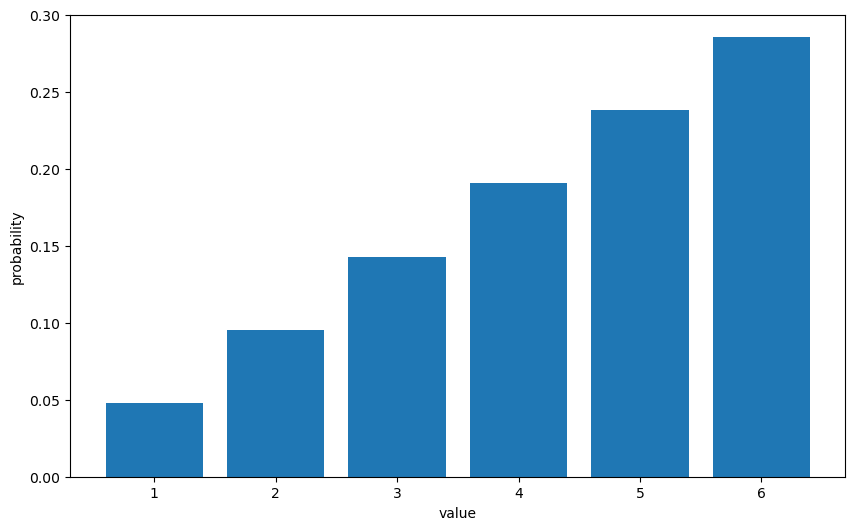

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel("value")
ax.set_ylabel("probability")

plt.show()


In [7]:
np.all(prob >= 0)


True

In [8]:
np.sum(prob)


1.000

In [9]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])


In [10]:
F(3)


0.286

In [11]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))


{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표


#### 평균


In [12]:
np.sum([x_k * f(x_k) for x_k in x_set])


4.333

In [13]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)


4.335

In [14]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])


In [15]:
E(X)


4.333

In [16]:
E(X, g=lambda x: 2 * x + 3)


11.667

In [17]:
2 * E(X) + 3


11.667

#### 분산


In [18]:
mean = E(X)
np.sum([(x_k - mean) ** 2 * f(x_k) for x_k in x_set])


2.222

In [19]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])


In [20]:
V(X)


2.222

In [21]:
V(X, lambda x: 2 * x + 3)


8.889

In [22]:
2**2 * V(X)


8.889